# Upper Confidence Bound

# Importing libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [8]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing UCB

In [9]:
import math
n = 10000
d = 10
adsSelected = []
numbersOfSelection = [0] * d
sumsOfRewards = [0] * d
totalReward = 0
for i in range(n):
    ad = 0
    maxUpperBound = 0
    for j in range(d):
        if numbersOfSelection[j] > 0:
            averageReward = sumsOfRewards[j] / numbersOfSelection[j]
            deltaI = math.sqrt(3/2 * math.log(n+1) / numbersOfSelection[j])
            upperBound = averageReward + deltaI
        else:
            upperBound = 1e400
        if upperBound > maxUpperBound:
            maxUpperBound = upperBound
            ad = j
    adsSelected.append(ad)
    numbersOfSelection[ad] += 1
    reward = dataset.values[i, ad]
    sumsOfRewards[ad] += reward
    totalReward += reward

# Visualising the results

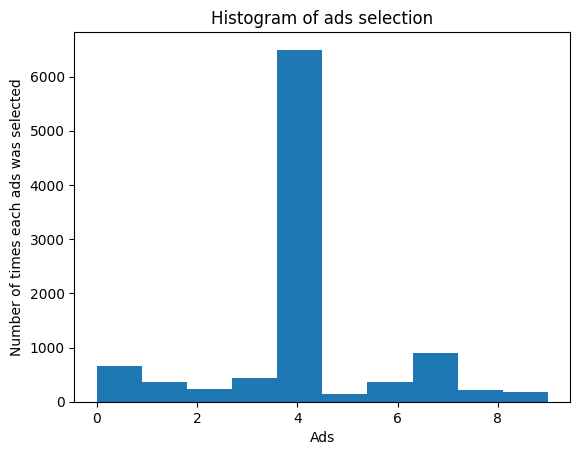

In [10]:
plt.hist(adsSelected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ads was selected')
plt.show()